In [1]:
import pandas as pd
import numpy as np

In [57]:
#Loading the dataset into Jupyter Notebook, where I can use Python to read and clean data and conduct 
#statistical analysis. 

missing_values = [".", "NaN"]
survey= pd.read_excel('/Users/cesurdagli/Desktop/Job 1/Avon 2019 Survey Database-2.xlsx', na_values = missing_values)
print(survey.shape)

# The dataset includes 1351 cases with 65 variables.

(1351, 65)


In [58]:
# Below you see first 5 cases. As seen below the dataset needs to be cleaned and prepared for data analysis.
survey.head()

,Database,Q19,Q11,Q12,Q12_4_TEXT,Q13,Q13_11_TEXT,Q14,Q15,Q1_1,...,Unnamed: 55,Unnamed: 56,Q17 adjusted values,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,Do you wish to continue?,1. Who are you?,2. Which of the following best describes your ...,2. Which of the following best describes your ...,3. Which of the following best describes your ...,3. Which of the following best describes your ...,4. Is English your native language?,"If no, please list your native language(s):",In my school... - 5. Communication with famili...,...,NaN,NaN,Total,Q17_1,Q17_29,Q17_30,Q17_31,Q17_32,Q17_33,Q17_34
1,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,NaN,NaN,100,40,20,20,0,0,20,0
3,1.0,1,4,1,NaN,10,NaN,1,NaN,5,...,NaN,NaN,451,22.1729,22.1729,11.3082,11.0865,11.0865,22.1729,0
4,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,NaN,NaN,436,22.7064,22.9358,12.6147,22.9358,1.83486,4.81651,12.156


# Preparing Data for Analysis

In [59]:
# I need to drop unnecessary columns and rename the columns to make them more understandable.
# Below I am checking the columns' title. 
survey.columns

Index(['Database', 'Q19', 'Q11', 'Q12', 'Q12_4_TEXT', 'Q13', 'Q13_11_TEXT',
       'Q14', 'Q15', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7',
       'Q1_8', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8',
       'Q3_9', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8',
       'Q4_9', 'Q4_10', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10', 'Q17_1', 'Q17_29', 'Q17_30',
       'Q17_31', 'Q17_32', 'Q17_33', 'Q17_34', 'Q18', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Q17 adjusted values', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [60]:
# I am dropping the columns: (empty columns and unjusted columns for question 17)

survey=survey.drop(['Q17_1', 'Q17_29', 'Q17_30',
       'Q17_31', 'Q17_32', 'Q17_33', 'Q17_34','Q17 adjusted values','Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56'], axis=1)



In [61]:
survey.columns

Index(['Database', 'Q19', 'Q11', 'Q12', 'Q12_4_TEXT', 'Q13', 'Q13_11_TEXT',
       'Q14', 'Q15', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7',
       'Q1_8', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q3_6', 'Q3_7', 'Q3_8',
       'Q3_9', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8',
       'Q4_9', 'Q4_10', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6',
       'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10', 'Q18', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [62]:
#naming the columns

survey.columns=['srvytype', 'continue', 'role', 'gender', 'genderother', 'race', 'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1', 'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1', 'CC4', 'DP6', 'CC5', 'MR2', 'S3','E4', 'CC6', 'MR3', 'DP7', 'CC7', 'S4', 'MR4', 'DP8', 'dcs_race','dcs_homeCultures','dcs_nonEnglish','dcs_dialectsofEnglish','dcs_nationalOrigin', 'dcs_religion','dcs_sex','dcs_genderIdentity', 'dcs_disabilities', 'dcs_economicBackground','comments','dscmkr_schlleaders' , 'dscmkr_ft_teachers','dscmkr_pt_staff','dscmkr_staff','dscmkr_students','dscmkr_parentsFamilies','dscmkr_communityOrgnztns']


In [63]:
survey.columns

Index(['srvytype', 'continue', 'role', 'gender', 'genderother', 'race',
       'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7',
       'S4', 'MR4', 'DP8', 'dcs_race', 'dcs_homeCultures', 'dcs_nonEnglish',
       'dcs_dialectsofEnglish', 'dcs_nationalOrigin', 'dcs_religion',
       'dcs_sex', 'dcs_genderIdentity', 'dcs_disabilities',
       'dcs_economicBackground', 'comments', 'dscmkr_schlleaders',
       'dscmkr_ft_teachers', 'dscmkr_pt_staff', 'dscmkr_staff',
       'dscmkr_students', 'dscmkr_parentsFamilies',
       'dscmkr_communityOrgnztns'],
      dtype='object')

In [64]:
survey.head()

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,comments,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns
0,NaN,Do you wish to continue?,1. Who are you?,2. Which of the following best describes your ...,2. Which of the following best describes your ...,3. Which of the following best describes your ...,3. Which of the following best describes your ...,4. Is English your native language?,"If no, please list your native language(s):",In my school... - 5. Communication with famili...,...,"32. From your perspective, indicate the extent...","32. From your perspective, indicate the extent...",34. Use the space below to tell us anything on...,Q17_1,Q17_29,Q17_30,Q17_31,Q17_32,Q17_33,Q17_34
1,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,40,20,20,0,0,20,0
3,1.0,1,4,1,NaN,10,NaN,1,NaN,5,...,3,3,NaN,22.1729,22.1729,11.3082,11.0865,11.0865,22.1729,0
4,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,3,3,NaN,22.7064,22.9358,12.6147,22.9358,1.83486,4.81651,12.156


In [65]:
#As seen above I dont need the first row so I am excluding first row from the dataframe

survey = survey.iloc[1:]
survey.head()

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,comments,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns
1,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,40,20,20,0,0,20,0
3,1.0,1,4,1,NaN,10,NaN,1,NaN,5,...,3,3,NaN,22.1729,22.1729,11.3082,11.0865,11.0865,22.1729,0
4,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,3,3,NaN,22.7064,22.9358,12.6147,22.9358,1.83486,4.81651,12.156
5,1.0,1,4,2,NaN,10,NaN,1,NaN,5,...,5,4,NaN,45.4545,22.7273,11.3636,11.3636,2.27273,6.81818,0


In [66]:
# Checking how many prefers not to continue
survey['continue'].value_counts()

# There are 12 No and 4 missing values.

1    1334
2      12
Name: continue, dtype: int64

In [67]:
#Below are those who wished not to continue and missing values 
print(survey.shape)
survey[survey['continue']!=1]



(1350, 54)


,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,comments,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns
23,1.0,NaN,4,1,NaN,10,NaN,1,NaN,5,...,5,5,NaN,20,20,0,20,20,20,0
198,1.0,NaN,4,1,NaN,10,NaN,1,NaN,3,...,3,3,my family is multi racial so the box for my ra...,18.9376,18.4758,18.9376,16.3972,11.0855,16.1663,0
217,1.0,2,4,1,NaN,7,NaN,2,Spanish,4,...,4,4,NaN,0,0,0,100,0,0,0
271,1.0,NaN,4,1,NaN,10,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,1.0,2,4,1,NaN,10,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,1.0,NaN,4,1,NaN,10,NaN,1,NaN,5,...,3,3,NaN,20.4082,19.1837,16.5306,15.7143,9.79592,8.36735,10
820,1.0,2,4,2,NaN,10,NaN,1,NaN,4,...,4,4,NaN,14.2384,14.2384,14.2384,14.5695,15.5629,13.0795,14.0728
957,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# I am dropping the cases above who wished not to continue and missing vlaues from the dataframe.

survey=survey[survey['continue']==1]
survey.shape

# So now the dataframe includes 1134 cases with 54 columns.

(1334, 54)

In [69]:
# Reset the index as we dropped some cases in the previous step
survey= survey.reset_index(drop=True)

In [70]:
print(survey.shape)
survey.head()

(1334, 54)


,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,comments,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns
0,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,4,4,NaN,40,20,20,0,0,20,0
2,1.0,1,4,1,NaN,10,NaN,1,NaN,5,...,3,3,NaN,22.1729,22.1729,11.3082,11.0865,11.0865,22.1729,0
3,1.0,1,4,1,NaN,10,NaN,1,NaN,4,...,3,3,NaN,22.7064,22.9358,12.6147,22.9358,1.83486,4.81651,12.156
4,1.0,1,4,2,NaN,10,NaN,1,NaN,5,...,5,4,NaN,45.4545,22.7273,11.3636,11.3636,2.27273,6.81818,0


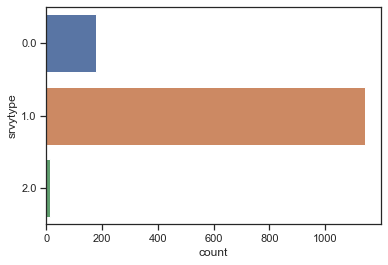

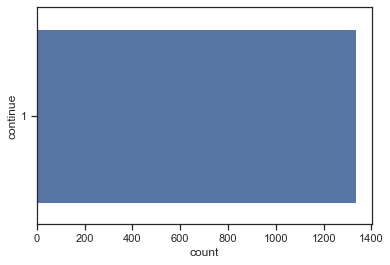

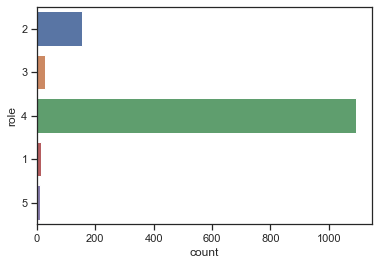

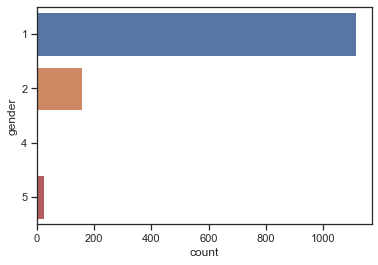

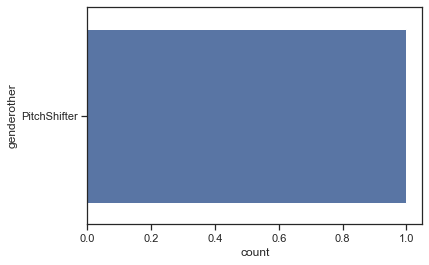

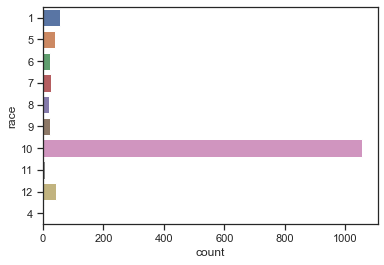

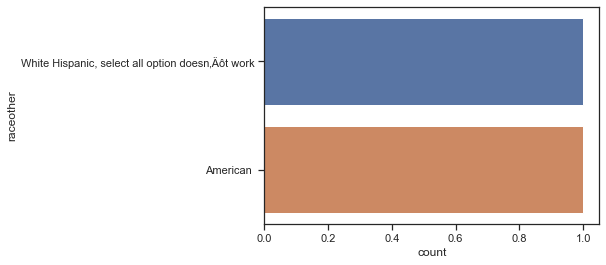

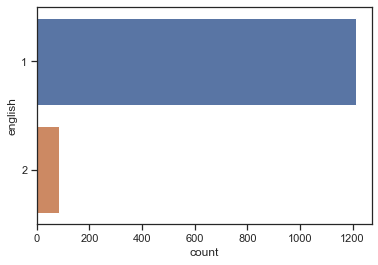

In [71]:
#The graphs show the distribution of each variable.

import seaborn as sns
import matplotlib.pyplot as plt
survey1 = survey[['srvytype', 'continue', 'role', 'gender', 'genderother', 'race','raceother', 'english']]
for i, col in enumerate(survey1.columns):
    plt.figure(i)
    sns.countplot(y=col, data=survey1)

# As seen on the graphs there are some coding issues for the role, gender, and race variables. They don't match with the codes provided in the excel sheet. For instance, the role variable shouldn't have 10. 

# Descriptive Statistics

In [72]:
# Descriptive statistics for the CC items. 
survey[["CC1", "CC2", "CC3", "CC4", "CC5", "CC6", "CC7"]].describe()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7
count,1128,1127,1046,1044,1042,931,924
unique,5,5,5,5,5,5,5
top,4,4,4,4,3,3,3
freq,497,417,410,411,389,399,407


In [73]:
# Descriptive statistics for the DP items. 
survey[['DP1','DP2','DP3','DP4','DP5','DP6','DP7', 'DP8']].describe()

,DP1,DP2,DP3,DP4,DP5,DP6,DP7,DP8
count,1130,1127,1128,1048,1047,1044,929,929
unique,5,5,5,5,5,5,5,5
top,4,4,4,4,3,3,3,4
freq,490,340,408,349,384,340,298,440


In [74]:
# Descriptive statistics for the E items. 
survey[["E1", "E2", "E3", "E4"]].describe()

,E1,E2,E3,E4
count,1129,1129,1046,927
unique,5,5,5,5
top,4,4,4,3
freq,527,403,538,570


In [75]:
# Descriptive statistics for the MR items. 
survey[["MR1", "MR2", "MR3", "MR4"]].describe()

,MR1,MR2,MR3,MR4
count,1044,937,931,924
unique,5,5,5,5
top,4,4,4,4
freq,460,463,433,408


In [76]:
# Descriptive statistics for the S items. 
survey[["S1", "S2", "S3", "S4"]].describe()

,S1,S2,S3,S4
count,1129,1047,933,927
unique,5,5,5,5
top,4,4,4,4
freq,586,416,384,403


In [77]:
# Checking the native languages of students
survey[survey['nativelanguage'].notnull()]

,srvytype,continue,role,gender,genderother,race,raceother,english,nativelanguage,DP1,...,dcs_disabilities,dcs_economicBackground,comments,dscmkr_schlleaders,dscmkr_ft_teachers,dscmkr_pt_staff,dscmkr_staff,dscmkr_students,dscmkr_parentsFamilies,dscmkr_communityOrgnztns
53,1.0,1,4,1,NaN,5,NaN,2,Punjabi,5,...,1,1,NaN,14.2857,14.2857,14.2857,14.2857,14.2857,14.2857,14.2857
86,1.0,1,4,2,NaN,5,NaN,2,Tamil,4,...,4,4,NaN,13.7809,14.1343,14.1343,13.9576,14.311,14.6643,15.0177
94,1.0,1,4,1,NaN,10,NaN,2,"Ukrainian, Russian",4,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1.0,1,4,1,NaN,7,NaN,2,Spanish,5,...,3,3,NaN,22.5225,22.5225,13.5135,11.7117,11.7117,13.5135,4.5045
124,1.0,1,4,1,NaN,10,NaN,2,Bulgarian,4,...,4,3,NaN,20.2673,20.0445,19.5991,15.5902,11.804,12.6949,0
131,1.0,1,4,2,NaN,5,NaN,2,Punjabi,5,...,4,4,NaN,14.7059,14.7059,11.7647,14.7059,14.7059,14.7059,14.7059
139,1.0,1,4,5,NaN,12,NaN,2,Filipino,4,...,3,3,NaN,26.3158,21.0526,10.5263,15.7895,10.5263,5.26316,10.5263
143,1.0,1,4,1,NaN,8,NaN,2,Spanish,5,...,3,3,They will need more strictly response for bull...,16.6667,16.6667,16.6667,16.6667,8.33333,16.6667,8.33333
162,1.0,1,4,2,NaN,5,NaN,2,Tagalog,5,...,4,3,NaN,19.0736,19.0736,18.2561,7.35695,8.17439,13.8965,14.1689
165,1.0,1,4,1,NaN,6,NaN,2,Igbo,5,...,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#the number of missing values per variable. 
print(survey[:].isnull().sum())

srvytype                       0
continue                       0
role                          32
gender                        36
genderother                 1333
race                          36
raceother                   1332
english                       36
nativelanguage              1258
DP1                          204
S1                           205
CC1                          206
E1                           205
DP2                          207
DP3                          206
CC2                          207
E2                           205
DP4                          286
CC3                          288
S2                           287
DP5                          287
E3                           288
MR1                          290
CC4                          290
DP6                          290
CC5                          292
MR2                          397
S3                           401
E4                           407
CC6                          403
MR3       

# Reliability Testing

In [79]:
survey.columns

Index(['srvytype', 'continue', 'role', 'gender', 'genderother', 'race',
       'raceother', 'english', 'nativelanguage', 'DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7',
       'S4', 'MR4', 'DP8', 'dcs_race', 'dcs_homeCultures', 'dcs_nonEnglish',
       'dcs_dialectsofEnglish', 'dcs_nationalOrigin', 'dcs_religion',
       'dcs_sex', 'dcs_genderIdentity', 'dcs_disabilities',
       'dcs_economicBackground', 'comments', 'dscmkr_schlleaders',
       'dscmkr_ft_teachers', 'dscmkr_pt_staff', 'dscmkr_staff',
       'dscmkr_students', 'dscmkr_parentsFamilies',
       'dscmkr_communityOrgnztns'],
      dtype='object')

In [80]:
# getting only the survey items and loading them into a new dataframe
srvy=survey[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7',
       'S4', 'MR4', 'DP8']]

In [81]:
srvy.head()

,DP1,S1,CC1,E1,DP2,DP3,CC2,E2,DP4,CC3,...,MR2,S3,E4,CC6,MR3,DP7,CC7,S4,MR4,DP8
0,4,4,4,4,3,3,4,2,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,4,4,4,4,4,4,4,3,3,...,4,4,3,3,4,2,4,4,4,4
2,5,5,3,5,3,5,5,5,5,3,...,5,5,3,3,5,2,3,3,3,3
3,4,4,4,4,3,4,4,4,4,3,...,4,4,3,4,4,1,4,4,4,4
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,3,5,2,3,5,5,5


In [82]:
# reordring the columns based on scales
srvy = srvy.reindex(sorted(srvy.columns), axis=1)
srvy.head()

,CC1,CC2,CC3,CC4,CC5,CC6,CC7,DP1,DP2,DP3,...,E3,E4,MR1,MR2,MR3,MR4,S1,S2,S3,S4
0,4,4,3,4,4,NaN,NaN,4,3,3,...,4,NaN,4,NaN,NaN,NaN,4,4,NaN,NaN
1,4,4,3,4,4,3,4,4,4,4,...,4,3,3,4,4,4,4,4,4,4
2,3,5,3,3,3,3,3,5,3,5,...,NaN,3,3,5,5,3,5,3,5,3
3,4,4,3,4,4,4,4,4,3,4,...,4,3,4,4,4,4,4,4,4,4
4,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [83]:
#dropping the nul values for the reliability testing. After dropping the null values the dataframe includes 891 cases,
#which is sufficient to calculate croanbach alpha score for each scale.
srvy=srvy.dropna()

srvy.shape

(891, 27)

In [84]:
# Resetting the index
srvy=srvy.reset_index(drop=True)

In [85]:
#Converting objedcts to intergers
srvy=srvy.astype(str).astype(int)

In [86]:
# Now calculating the croanbach alpha score for each scale
import pingouin as pg
print(pg.cronbach_alpha(data=srvy[['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['DP1', 'DP2', 'DP3','DP4', 'DP5', 'DP6', 'DP7', 'DP8']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['E1', 'E2', 'E3', 'E4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['MR1', 'MR2','MR3', 'MR4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['S1', 'S2', 'S3', 'S4']], nan_policy='listwise'))

(0.899413, array([0.889, 0.909]))
(0.768168, array([0.744, 0.79 ]))
(0.676966, array([0.641, 0.71 ]))
(0.840247, array([0.822, 0.857]))
(0.85042, array([0.834, 0.866]))


In [87]:
survey2=survey[['DP1', 'S1', 'CC1', 'E1',
       'DP2', 'DP3', 'CC2', 'E2', 'DP4', 'CC3', 'S2', 'DP5', 'E3', 'MR1',
       'CC4', 'DP6', 'CC5', 'MR2', 'S3', 'E4', 'CC6', 'MR3', 'DP7', 'CC7',
       'S4', 'MR4', 'DP8']]

In [88]:
#Converting object to numeric
survey2 = survey2.apply(pd.to_numeric, args=('coerce',))

In [89]:
survey2.shape

(1334, 27)

In [90]:
# Now calculating the croanbach alpha score for each scale
import pingouin as pg
print(pg.cronbach_alpha(data=survey2[['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=survey2[['DP1', 'DP2', 'DP3','DP4', 'DP5', 'DP6', 'DP7', 'DP8']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=survey2[['E1', 'E2', 'E3', 'E4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=survey2[['MR1', 'MR2','MR3', 'MR4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=survey2[['S1', 'S2', 'S3', 'S4']], nan_policy='listwise'))

(0.901108, array([0.893, 0.909]))
(0.77246, array([0.754, 0.79 ]))
(0.683438, array([0.655, 0.71 ]))
(0.84142, array([0.827, 0.855]))
(0.850572, array([0.837, 0.863]))


          E1        E2        E3        E4
E1  1.000000  0.336938  0.524896  0.295812
E2  0.336938  1.000000  0.341339  0.258636
E3  0.524896  0.341339  1.000000  0.325473
E4  0.295812  0.258636  0.325473  1.000000


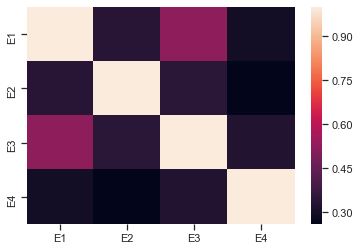

In [91]:
corr=srvy[['E1', 'E2', 'E3', 'E4']].corr()
print(corr)
sns.heatmap(corr)

# The alpha score for the Equity scale was found as .68, which is less than acceptable level. I also check the correlations among the Equity items and found the low correlation between E1-E2, E2-E3, E2-E4, and E1-E4; moderate correlations between E1-E3. Removing one of these items did not help to incresase the score.

8. Instruction is modified to meet the educational needs of a range of learners. 
12. Testing and test scores are not used in ways that impact the students’ feelings of self-worth. 
17. Educators strive to ensure educational outcomes are not different based on students’ race, language, 
national origin, religion, sex, gender identity, dis/abilities, and economic background. 
24. Multilingual students and families are offered information about college readiness expectations and opportunities. 


# Factor Analysis

In [92]:
from factor_analyzer import FactorAnalyzer


In [93]:
srvy.columns

Index(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'DP1', 'DP2', 'DP3',
       'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'E1', 'E2', 'E3', 'E4', 'MR1', 'MR2',
       'MR3', 'MR4', 'S1', 'S2', 'S3', 'S4'],
      dtype='object')

# Before performing factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

Bartlett’s Test
Kaiser-Meyer-Olkin Test
Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [94]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(srvy)
chi_square_value, p_value

(15373.744410383306, 0.0)

# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [95]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(srvy)

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [96]:
#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
kmo_model

0.9678795181361991

# The overall KMO for our data is 0.96, which is excellent. This value indicates that we can proceed with the planned factor analysis.

In [97]:
fa1 = FactorAnalyzer(5, rotation="varimax")
fa1.fit(srvy) 
fa1.loadings_

array([[ 0.40043226,  0.17318568,  0.58048408,  0.21933325,  0.11910918],
       [ 0.69663522,  0.20109238,  0.34245403,  0.04490046,  0.20317916],
       [ 0.43159334,  0.26409285,  0.23674328,  0.40652097,  0.31051112],
       [ 0.69404948,  0.20518218,  0.33598008,  0.1911242 ,  0.16032625],
       [ 0.56794484,  0.26230008,  0.14363722,  0.34447929,  0.26011688],
       [ 0.50452094,  0.24809464,  0.11037327,  0.52586086,  0.26761976],
       [ 0.54625992,  0.20375417,  0.15805653,  0.31854005,  0.32840329],
       [ 0.12646552,  0.22757716,  0.51083855,  0.16790469,  0.18224366],
       [ 0.22915279,  0.73315704,  0.21500903,  0.12271767,  0.12174071],
       [ 0.25759688,  0.66217026,  0.3086853 ,  0.07797077,  0.36405195],
       [ 0.31304741,  0.51526975,  0.20386802,  0.04281335,  0.54946434],
       [ 0.27676559,  0.44630896,  0.25081695,  0.23826323,  0.49608427],
       [ 0.2184104 ,  0.61959064,  0.20198738,  0.2424225 ,  0.26789808],
       [-0.12187174, -0.27034267, -0.1

In [98]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(27, rotation=None)
fa1.fit(srvy)
# Check Eigenvalues
ev, v = fa1.get_eigenvalues()
ev

array([13.04265883,  1.52023362,  1.13240558,  0.95357291,  0.9272196 ,
        0.81229606,  0.75078286,  0.70278347,  0.62872456,  0.57937672,
        0.57172257,  0.48562464,  0.4655834 ,  0.43584684,  0.41136188,
        0.40471158,  0.38462043,  0.38022661,  0.34945724,  0.32060314,
        0.28660725,  0.27688221,  0.26983147,  0.24351462,  0.23477157,
        0.22038687,  0.20819349])

# There are 3-factors eigenvalues that are greater than one. It means we need to choose only 3 factors (or unobserved variables). Note that the fourth one is really close to 1 as well.

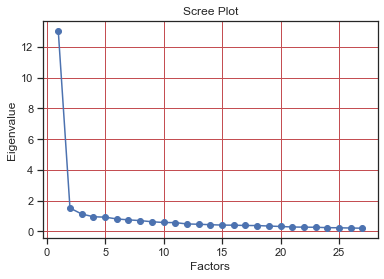

In [99]:
# Create scree plot using matplotlib
plt.scatter(range(1,srvy.shape[1]+1),ev)
plt.plot(range(1,srvy.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(color='r', linestyle='-')
plt.show()

# the plot also resulted in 3 factors. Both are based on eigenvalues.

In [100]:
# Create factor analysis object and perform factor analysis
fa1 = FactorAnalyzer(3, rotation="varimax")
fa1.fit(srvy)
fa1.loadings_

array([[ 0.41490746,  0.21365413,  0.58703367],
       [ 0.57738195,  0.28994215,  0.32054185],
       [ 0.58510114,  0.37138414,  0.29600228],
       [ 0.65420817,  0.26226118,  0.34012692],
       [ 0.67154162,  0.34347463,  0.18364918],
       [ 0.70524042,  0.32779402,  0.1980598 ],
       [ 0.64947805,  0.32891613,  0.20071535],
       [ 0.16409625,  0.29182893,  0.53221614],
       [ 0.23107364,  0.65576435,  0.21409319],
       [ 0.24787547,  0.76041656,  0.29486276],
       [ 0.31940904,  0.71833129,  0.20143872],
       [ 0.38115258,  0.63406316,  0.28098215],
       [ 0.29792378,  0.66063207,  0.22381962],
       [-0.187158  , -0.36964937, -0.17996687],
       [ 0.2571279 ,  0.45540057,  0.1906466 ],
       [ 0.35273908,  0.27746321,  0.56009975],
       [ 0.27335278,  0.2645683 ,  0.27719521],
       [ 0.56751479,  0.18330723,  0.50404941],
       [ 0.47083847,  0.23350084,  0.0966538 ],
       [ 0.35282402,  0.32658984,  0.47820563],
       [ 0.72062765,  0.26835085,  0.333

In [101]:
# converting loadings into a table for better view
loadings=pd.DataFrame(data=fa1.loadings_,
          index=np.array(range(1, 28)),
          columns=np.array(range(1, 4)))
loadings

,1,2,3
1,0.414907,0.213654,0.587034
2,0.577382,0.289942,0.320542
3,0.585101,0.371384,0.296002
4,0.654208,0.262261,0.340127
5,0.671542,0.343475,0.183649
6,0.705240,0.327794,0.198060
7,0.649478,0.328916,0.200715
8,0.164096,0.291829,0.532216
9,0.231074,0.655764,0.214093
10,0.247875,0.760417,0.294863


In [102]:
# converting loadings into a table for better view
loadings=pd.DataFrame(data=fa1.loadings_,
          index=['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'DP1', 'DP2', 'DP3',
       'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'E1', 'E2', 'E3', 'E4', 'MR1', 'MR2',
       'MR3', 'MR4', 'S1', 'S2', 'S3', 'S4'],
          columns=np.array(range(1, 4)))

loadings

,1,2,3
CC1,0.414907,0.213654,0.587034
CC2,0.577382,0.289942,0.320542
CC3,0.585101,0.371384,0.296002
CC4,0.654208,0.262261,0.340127
CC5,0.671542,0.343475,0.183649
CC6,0.705240,0.327794,0.198060
CC7,0.649478,0.328916,0.200715
DP1,0.164096,0.291829,0.532216
DP2,0.231074,0.655764,0.214093
DP3,0.247875,0.760417,0.294863


# Factor 1 has high factor loadings for 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7' , E3, MR2, MR3, and S4
Factor 2 has high factor loadings for 'DP2', 'DP3','DP4', 'DP5', 'DP6', S2, and S3
Factor 3 has high factor loadings for CC1, DP1, E1, and S1

In [103]:
srvy.columns

Index(['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7', 'DP1', 'DP2', 'DP3',
       'DP4', 'DP5', 'DP6', 'DP7', 'DP8', 'E1', 'E2', 'E3', 'E4', 'MR1', 'MR2',
       'MR3', 'MR4', 'S1', 'S2', 'S3', 'S4'],
      dtype='object')

In [104]:
fa1.get_factor_variance()

(array([5.93419526, 4.97652301, 3.43727716]),
 array([0.21978501, 0.18431567, 0.12730656]),
 array([0.21978501, 0.40410068, 0.53140724]))

# Total 53% cumulative Variance explained by the 3 factors.


In [105]:
fa1.get_communalities()

array([0.56240482, 0.52018345, 0.56788687, 0.61245557, 0.60266999,
       0.64404065, 0.57029422, 0.39534573, 0.52925781, 0.72661964,
       0.65859953, 0.62626435, 0.57528853, 0.20405685, 0.30985057,
       0.51512242, 0.22155531, 0.6097404 , 0.28555347, 0.45982633,
       0.70225072, 0.60690188, 0.51078397, 0.53764076, 0.55100069,
       0.60047454, 0.64192638])

# Low values (less than 0.4) may be considered for removal as they don't have significant loading scores on any factor. For instance, DP1, DP7, DP8, E2,  and E4 need to be considered for removal.


In [113]:
# As the results of Factor Analysis suggested I am removing DP, DP7, and DP8.
print(pg.cronbach_alpha(data=survey2[['DP2', 'DP3','DP4', 'DP5', 'DP6']], nan_policy='listwise'))


(0.891282, array([0.882, 0.9  ]))


# After removing the DP1, DP7, and DP8 (as the result of the Factor Analysis suggested) the Croanbach alpha score significantly increased from 0.76 to 0.89.

In [118]:
print(pg.cronbach_alpha(data=srvy[['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['DP1', 'DP2', 'DP3','DP4', 'DP5', 'DP6', 'DP7', 'DP8']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['E1', 'E2', 'E3', 'E4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['MR1', 'MR2','MR3', 'MR4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['S1', 'S2', 'S3', 'S4']], nan_policy='listwise'))

(0.899413, array([0.889, 0.909]))
(0.768168, array([0.744, 0.79 ]))
(0.676966, array([0.641, 0.71 ]))
(0.840247, array([0.822, 0.857]))
(0.85042, array([0.834, 0.866]))


In [119]:
print(pg.cronbach_alpha(data=srvy[['CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7']], nan_policy='listwise'))

(0.894176, array([0.883, 0.905]))


In [123]:
print(pg.cronbach_alpha(data=srvy[['MR2','MR3', 'MR4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['MR2','MR3']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['MR2','MR3', 'S4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['MR2','MR3', 'S4', 'E3']], nan_policy='listwise'))


(0.830852, array([0.811, 0.849]))
(0.790089, array([0.761, 0.816]))
(0.841719, array([0.823, 0.859]))
(0.870323, array([0.856, 0.884]))


In [124]:
print(pg.cronbach_alpha(data=srvy[['E1', 'E3', 'E4']], nan_policy='listwise'))
print(pg.cronbach_alpha(data=srvy[['E1', 'E3']], nan_policy='listwise'))



(0.652371, array([0.611, 0.69 ]))
(0.685941, array([0.642, 0.725]))


# Even thoguh I removed E2 and E4 from the Equity scale the alpha score did not increase significantly. It is still less than .7

# Confirmatory Factor Analysis

In [106]:
import pandas as pd
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
#X = pd.read_csv('tests/data/test11.csv')
model_dict = {"F1": ["CC1", "CC2", "CC3", "CC4", "CC5", "CC6", "CC7"], 
              "F2": ["DP1", "DP2", "DP3", "DP4", "DP5", "DP6", "DP7", "DP8"],
              "F3": ["E1", "E2", "E3", "E4"],
              "F4": ["MR1", "MR2", "MR3", "MR4"],
              "F5": ["S1", "S2", "S3", "S4"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(srvy, model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(srvy.values)
cfa.loadings_

array([[ 0.6101624 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.88635141,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.86646304,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.80371135,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.95002789,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.80964475,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.64763269,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.62126441,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.04194871,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.20497939,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.05007943,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.88235884,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.04700468,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.41003498,  0. 

In [107]:
cfa.factor_varcovs_

array([[1.        , 0.71291877, 0.8348359 , 1.08487957, 0.93470458],
       [0.71291877, 1.        , 0.51643283, 0.62876806, 1.00327263],
       [0.8348359 , 0.51643283, 1.        , 0.77909405, 0.65170771],
       [1.08487957, 0.62876806, 0.77909405, 1.        , 0.94987103],
       [0.93470458, 1.00327263, 0.65170771, 0.94987103, 1.        ]])

In [108]:
 cfa.get_standard_errors()

(array([[0.02769923, 0.        , 0.        , 0.        , 0.        ],
        [0.03082787, 0.        , 0.        , 0.        , 0.        ],
        [0.02972374, 0.        , 0.        , 0.        , 0.        ],
        [0.02717193, 0.        , 0.        , 0.        , 0.        ],
        [0.0302489 , 0.        , 0.        , 0.        , 0.        ],
        [0.02720364, 0.        , 0.        , 0.        , 0.        ],
        [0.02452617, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.03754535, 0.        , 0.        , 0.        ],
        [0.        , 0.03498966, 0.        , 0.        , 0.        ],
        [0.        , 0.03354937, 0.        , 0.        , 0.        ],
        [0.        , 0.03191762, 0.        , 0.        , 0.        ],
        [0.        , 0.02859485, 0.        , 0.        , 0.        ],
        [0.        , 0.03401092, 0.        , 0.        , 0.        ],
        [0.        , 0.04940274, 0.        , 0.        , 0.        ],
        [0.        ,

In [109]:
cfa.transform(srvy.values)

array([[ 0.43779244,  0.33802919,  0.38297948,  0.29919876,  0.81153924],
       [ 0.64181164,  0.70352412,  0.38297948,  0.43800963,  0.81153924],
       [ 0.87047342,  1.217802  ,  1.9009462 ,  1.78442187,  2.16774791],
       ...,
       [-0.17001418,  0.80268468,  0.47680968,  0.24430022, -1.19193943],
       [ 0.39475332,  0.77666947,  0.21064503,  0.43800963,  0.56490091],
       [ 0.81748403,  0.78268999,  0.51081769,  0.5768205 ,  0.81153924]])

In [110]:
cfa.get_model_implied_cov()

array([[ 0.84700659,  0.5408183 ,  0.52868317,  0.49039445,  0.5796713 ,
         0.49401479,  0.39516112,  0.27024768,  0.45324376,  0.52416149,
         0.45678059,  0.38382277,  0.45544309, -0.17836367,  0.30962914,
         0.44351631,  0.36672251,  0.38223264,  0.09447699,  0.46519894,
         0.44874849,  0.55632477,  0.41505569,  0.33729659,  0.43821088,
         0.43227871,  0.4183528 ],
       [ 0.5408183 ,  1.21687762,  0.76799073,  0.71237069,  0.84205856,
         0.71762977,  0.57403015,  0.39257484,  0.6584038 ,  0.76142232,
         0.66354158,  0.55755951,  0.66159865, -0.25909969,  0.44978226,
         0.64427324,  0.53271886,  0.55524962,  0.13724185,  0.67577047,
         0.65187375,  0.80814426,  0.60292996,  0.48997334,  0.63656631,
         0.62794896,  0.60771951],
       [ 0.52868317,  0.76799073,  1.14180263,  0.69638618,  0.82316405,
         0.70152725,  0.56114979,  0.38376606,  0.64363022,  0.74433717,
         0.64865272,  0.54504873,  0.64675339, -0.2532